In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import dblquad, nquad
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
pd.options.display.max_colwidth = 100

parameters = {'axes.labelsize': 25,
          'axes.titlesize': 30, 'xtick.labelsize':20,'ytick.labelsize':20, 'figure.titlesize':23, 'legend.fontsize':20 }
plt.rcParams.update(parameters)

In [2]:
N_Z_FCCee=6e12

fd=0.407
fd_err=0.007

fs=0.101
fs_err=0.008

BF_Z2bb=0.1512
BF_Z2bb_err=0.0005

BF_Bd2KstTauTau=1.3e-7
BF_Bd2KstTauTau_err=BF_Bd2KstTauTau*0.1

BF_Tau23PiNu=0.0931
BF_Tau23PiNu_err=0.0005

BF_Kstar2KPi=0.69# Kstar2KPi=0.7 KPi +0.3 K0SPi0

# BF_Bd2KstarDsDs=2.78e-4
# BF_Bd2KstarDsDs_err=0.51e-4


# BF_Bd2KstarDsstarDs=8.78e-4
# BF_Bd2KstarDsstarDs_err=2.41e-4

# BF_Bd2KstarDsstarDsstar=9.10e-4
# BF_Bd2KstarDsstarDsstar_err=2.60e-4

BF_Bd2KstarDsDs=5.47e-5
BF_Bd2KstarDsDs_err=1.92e-5

BF_Bd2KstarDsstarDs=1.73e-4
BF_Bd2KstarDsstarDs_err=0.70e-4

BF_Bd2KstarDsstarDsstar=1.79e-4
BF_Bd2KstarDsstarDsstar_err=0.72e-4

BF_Ds2TauNu=0.0532
BF_Ds2TauNu_err=0.0011

BF_Ds23PiPi0=5.58e-3
BF_Ds23PiPi0_err=0.34e-3

BF_Ds23Pi2Pi0=4.68e-2
BF_Ds23Pi2Pi0_err=0.64e-2

BF_Dsstar2Ds_Pi0_or_Gamma=0.993
BF_Dsstar2Ds_Pi0_or_Gamma_err=0.010


BF_Bs2KstarDTauNu=0.727e-4
BF_Bs2KstarDTauNu_err=0.192e-4

BF_Bs2KstarDstarTauNu=1.61e-4
BF_Bs2KstarDstarTauNu_err=0.42e-4

BF_D23PiPi0=1.16e-2
BF_D23PiPi0_err=0.08e-2

BF_Dstar2D0Pi=67.7e-2
BF_Dstar2D0Pi_err=0.5e-2

BF_Dstar2DPi0=30.7e-2
BF_Dstar2DPi0_err=0.5e-2

BF_D024PiPi0=4.2e-3
BF_D024PiPi0_err=0.5e-3

BF_Bd2KstarDsTauNu=0.917e-5
BF_Bd2KstarDsTauNu_err=0.155e-5

BF_Bd2KstarDsstarTauNu=2.03e-5
BF_Bd2KstarDsstarTauNu_err=0.34e-5


In [3]:
BF_Bd2KstarTauTau=BF_Z2bb*2*fd*BF_Bd2KstTauTau*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarTauTau_err=BF_Bd2KstarTauTau*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstTauTau_err/BF_Bd2KstTauTau)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5

BF_Bd2KstarDsDs_Ds2TauNu=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*(BF_Ds2TauNu**2)*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds2TauNu_err=BF_Bd2KstarDsDs_Ds2TauNu*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+2*(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsDs_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*(BF_Ds23PiPi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds23PiPi0_err=BF_Bd2KstarDsDs_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+2*(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsDs_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*(BF_Ds23Pi2Pi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds23Pi2Pi0_err=BF_Bd2KstarDsDs_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+2*(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23PiPi0*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0_err=BF_Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0_err=BF_Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsDs*BF_Ds23PiPi0*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0_err=BF_Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsDs_err/BF_Bd2KstarDsDs)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5

BF_Bd2KstarDsstarDs_Ds2TauNu=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*(BF_Ds2TauNu**2)*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds2TauNu_err=BF_Bd2KstarDsstarDs_Ds2TauNu*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+2*(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsstarDs_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*(BF_Ds23PiPi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds23PiPi0_err=BF_Bd2KstarDsstarDs_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+2*(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsstarDs_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*(BF_Ds23Pi2Pi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDs_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+2*(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23PiPi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0_err=BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDs*BF_Ds23PiPi0*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDs_err/BF_Bd2KstarDsstarDs)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5

BF_Bd2KstarDsstarDsstar_Ds2TauNu=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*(BF_Ds2TauNu**2)*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds2TauNu_err=BF_Bd2KstarDsstarDsstar_Ds2TauNu*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+2*(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsstarDsstar_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*(BF_Ds23PiPi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds23PiPi0_err=BF_Bd2KstarDsstarDsstar_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+2*(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsstarDsstar_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*(BF_Ds23Pi2Pi0**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDsstar_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+2*(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23PiPi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0_err=BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2)**0.5
BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*(BF_Ds2TauNu)*(BF_Tau23PiNu)*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5
BF_Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarDsstar*BF_Ds23PiPi0*BF_Ds23Pi2Pi0*BF_Kstar2KPi
BF_Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarDsstar_err/BF_Bd2KstarDsstarDsstar)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2)**0.5

BF_Bs2KstarDTauNu_D23PiPi0=BF_Z2bb*2*fs*BF_Bs2KstarDTauNu*BF_D23PiPi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bs2KstarDTauNu_D23PiPi0_err=BF_Bs2KstarDTauNu_D23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fs_err/fs)**2+(BF_Bs2KstarDTauNu_err/BF_Bs2KstarDTauNu)**2+(BF_D23PiPi0_err/BF_D23PiPi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0=BF_Z2bb*2*fs*BF_Bs2KstarDstarTauNu*BF_Dstar2D0Pi*BF_D024PiPi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0_err=BF_Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fs_err/fs)**2+(BF_Bs2KstarDstarTauNu_err/BF_Bs2KstarDstarTauNu)**2+(BF_Dstar2D0Pi_err/BF_Dstar2D0Pi)**2+(BF_D024PiPi0_err/BF_D024PiPi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0=BF_Z2bb*2*fs*BF_Bs2KstarDstarTauNu*BF_Dstar2DPi0*BF_D23PiPi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0_err=BF_Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fs_err/fs)**2+(BF_Bs2KstarDstarTauNu_err/BF_Bs2KstarDstarTauNu)**2+(BF_Dstar2DPi0_err/BF_Dstar2DPi0)**2+(BF_D23PiPi0_err/BF_D23PiPi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5

BF_Bd2KstarDsTauNu_Ds2TauNu=BF_Z2bb*2*fd*BF_Bd2KstarDsTauNu*BF_Ds2TauNu*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarDsTauNu_Ds2TauNu_err=BF_Bd2KstarDsTauNu_Ds2TauNu*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsTauNu_err/BF_Bd2KstarDsTauNu)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsTauNu_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsTauNu*BF_Ds23PiPi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bd2KstarDsTauNu_Ds23PiPi0_err=BF_Bd2KstarDsTauNu_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsTauNu_err/BF_Bd2KstarDsTauNu)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsTauNu_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsTauNu*BF_Ds23Pi2Pi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bd2KstarDsTauNu_Ds23Pi2Pi0_err=BF_Bd2KstarDsTauNu_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsTauNu_err/BF_Bd2KstarDsTauNu)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5

BF_Bd2KstarDsstarTauNu_Ds2TauNu=BF_Z2bb*2*fd*BF_Bd2KstarDsstarTauNu*BF_Ds2TauNu*(BF_Tau23PiNu**2)*BF_Kstar2KPi
BF_Bd2KstarDsstarTauNu_Ds2TauNu_err=BF_Bd2KstarDsstarTauNu_Ds2TauNu*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarTauNu_err/BF_Bd2KstarDsstarTauNu)**2+(BF_Ds2TauNu_err/BF_Ds2TauNu)**2+2*(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsstarTauNu_Ds23PiPi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarTauNu*BF_Ds23PiPi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bd2KstarDsstarTauNu_Ds23PiPi0_err=BF_Bd2KstarDsstarTauNu_Ds23PiPi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarTauNu_err/BF_Bd2KstarDsstarTauNu)**2+(BF_Ds23PiPi0_err/BF_Ds23PiPi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5
BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0=BF_Z2bb*2*fd*BF_Bd2KstarDsstarTauNu*BF_Ds23Pi2Pi0*BF_Tau23PiNu*BF_Kstar2KPi
BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0_err=BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0*((BF_Z2bb_err/BF_Z2bb)**2+(fd_err/fd)**2+(BF_Bd2KstarDsstarTauNu_err/BF_Bd2KstarDsstarTauNu)**2+(BF_Ds23Pi2Pi0_err/BF_Ds23Pi2Pi0)**2+(BF_Tau23PiNu_err/BF_Tau23PiNu)**2)**0.5

print(BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0)

7.511330280662208e-09


In [4]:
dico={
"Signal":{"Visible_BF":BF_Bd2KstarTauTau,"Visible_BF_err":BF_Bd2KstarTauTau_err},

"Bd2KstarDsDs_Ds2TauNu":{"Visible_BF":BF_Bd2KstarDsDs_Ds2TauNu,"Visible_BF_err":BF_Bd2KstarDsDs_Ds2TauNu_err},
"Bd2KstarDsDs_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsDs_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsDs_Ds23PiPi0_err},
"Bd2KstarDsDs_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsDs_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsDs_Ds23Pi2Pi0_err},
"Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0_err},
"Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0_err},
"Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDs_Ds2TauNu":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds2TauNu,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds2TauNu_err},
"Bd2KstarDsstarDs_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds23PiPi0_err},
"Bd2KstarDsstarDs_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0_err},
"Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDsstar_Ds2TauNu":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds2TauNu,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds2TauNu_err},
"Bd2KstarDsstarDsstar_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds23PiPi0_err},
"Bd2KstarDsstarDsstar_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0_err},
"Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0_err},
"Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0_err},

"Bs2KstarDTauNu_D23PiPi0":{"Visible_BF":BF_Bs2KstarDTauNu_D23PiPi0,"Visible_BF_err":BF_Bs2KstarDTauNu_D23PiPi0_err},
"Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0":{"Visible_BF":BF_Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0,"Visible_BF_err":BF_Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0_err},
"Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0":{"Visible_BF":BF_Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0,"Visible_BF_err":BF_Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0_err},

"Bd2KstarDsTauNu_Ds2TauNu":{"Visible_BF":BF_Bd2KstarDsTauNu_Ds2TauNu,"Visible_BF_err":BF_Bd2KstarDsTauNu_Ds2TauNu_err},
"Bd2KstarDsTauNu_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsTauNu_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsTauNu_Ds23PiPi0_err},
"Bd2KstarDsTauNu_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsTauNu_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsTauNu_Ds23Pi2Pi0_err},
"Bd2KstarDsstarTauNu_Ds2TauNu":{"Visible_BF":BF_Bd2KstarDsstarTauNu_Ds2TauNu,"Visible_BF_err":BF_Bd2KstarDsstarTauNu_Ds2TauNu_err},
"Bd2KstarDsstarTauNu_Ds23PiPi0":{"Visible_BF":BF_Bd2KstarDsstarTauNu_Ds23PiPi0,"Visible_BF_err":BF_Bd2KstarDsstarTauNu_Ds23PiPi0_err},
"Bd2KstarDsstarTauNu_Ds23Pi2Pi0":{"Visible_BF":BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0,"Visible_BF_err":BF_Bd2KstarDsstarTauNu_Ds23Pi2Pi0_err}


}

In [5]:
eff_Ds2TauNu=(0.101)**0.5
eff_Ds23PiPi0=(0.005)**0.5
eff_Ds23Pi2Pi0=(0.191)**0.5

eff_star=(0.365)**0.5

In [6]:
pd.set_option('display.float_format', '{:.2E}'.format)
df=pd.DataFrame.from_dict(dico).T
def over_threshold(series):
    highlight = 'background-color: darkorange;'
    default = ''
    return [highlight if abs(e) > 1e-9 else default for e in series]
def b2cTauNu_bkgs(series):
    highlight = 'background-color: darkgreen;'
    default = ''
    return [highlight if (("Bs" in e )or("Bd2KstarDsTauNu" in e)or("Bd2KstarDsstarTauNu" in e))else default for e in series]
def is_sig(series):
    highlight = 'background-color: darkblue;'
    default = ''
    return [highlight if e=="Signal" else default for e in series]
def no_eff_pred(series):
    highlight = 'background-color: darkred;'
    default = ''
    return [highlight if e==1 else default for e in series]
df["nEvents_FCCee"]=N_Z_FCCee*df["Visible_BF"]
df["nEvents_FCCee_err"]=N_Z_FCCee*df["Visible_BF_err"]
df.index.name = 'Mode'
df
df.reset_index(inplace=True)
df["nb_Ds"]=df["Mode"].str.count("Ds")-df["Mode"].str.count("Dsstar")-df["Mode"].str.count("Ds2")-df["Mode"].str.count("Dstar")
df["nb_Dsstar"]=df["Mode"].str.count("Dsstar")
df["nb_Ds2TauNu"]=df["Mode"].str.count("Ds2TauNu")
df["nb_Ds23PiPi0"]=df["Mode"].str.count("Ds23PiPi0")
df["nb_Ds23Pi2Pi0"]=df["Mode"].str.count("Ds23Pi2Pi0")
df["nb_Ds2TauNu"][((df["nb_Ds"]+df["nb_Dsstar"])==2)*(df["nb_Ds23PiPi0"]==0)*(df["nb_Ds23Pi2Pi0"]==0)]=2
df["nb_Ds23PiPi0"][((df["nb_Ds"]+df["nb_Dsstar"])==2)*(df["nb_Ds2TauNu"]==0)*(df["nb_Ds23Pi2Pi0"]==0)]=2
df["nb_Ds23Pi2Pi0"][((df["nb_Ds"]+df["nb_Dsstar"])==2)*(df["nb_Ds23PiPi0"]==0)*(df["nb_Ds2TauNu"]==0)]=2
#df["nb_decay"]=df["nb_Ds2TauNu"]+df["nb_Ds23PiPi0"]+df["nb_Ds23Pi2Pi0"]
#df["nb_Ds+Dsstar"]=df["nb_Ds"]+df["nb_Dsstar"]
df["eff_pred"]=(eff_star**df["nb_Dsstar"])*(eff_Ds2TauNu**df["nb_Ds2TauNu"])*(eff_Ds23PiPi0**df["nb_Ds23PiPi0"])*(eff_Ds23Pi2Pi0**df["nb_Ds23Pi2Pi0"])
df["eff_pred"][df["Mode"]=="Signal"]=0.313
df["eff_pred"][df["Mode"]=="Bs2KstarDTauNu_D23PiPi0"]=df["eff_pred"][df["Mode"]=="Bd2KstarDsTauNu_Ds23Pi2Pi0"].values
df["eff_pred"][df["Mode"]=="Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0"]=df["eff_pred"][df["Mode"]=="Bd2KstarDsTauNu_Ds23Pi2Pi0"].values
df["eff_pred"][df["Mode"]=="Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0"]=df["eff_pred"][df["Mode"]=="Bd2KstarDsTauNu_Ds23Pi2Pi0"].values
df["Visible_BF*eff"]=df["Visible_BF"]*df["eff_pred"]
format_dict = {'Visible_BF': '{:.2E}', 'Visible_BF_err': '{:.2E}','nEvents_FCCee': '{:.2E}','nEvents_FCCee_err': '{:.2E}', 'Visible_BF*eff': '{:2E}'}
#df.columns=["Mode","Visible_BF","Visible_BF_err"]
df=df.drop(['Visible_BF_err','nEvents_FCCee','nEvents_FCCee_err','nb_Ds','nb_Dsstar','nb_Ds2TauNu','nb_Ds23PiPi0','nb_Ds23Pi2Pi0'],axis=1)
(df.sort_values("Visible_BF*eff",ascending=False)
.style
.apply(b2cTauNu_bkgs, axis=0, subset=['Mode'])
.apply(is_sig, axis=0, subset=['Mode'])
.apply(no_eff_pred, axis=0, subset=['eff_pred'])
#.apply(over_threshold, axis=0, subset=['Visible_BF'])
.format(format_dict)
)

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_13987/3441537185.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nb_Ds2TauNu"][((df["nb_Ds"]+df["nb_Dsstar"])==2)*(df["nb_Ds23PiPi0"]==0)*(df["nb_Ds23Pi2Pi0"]==0)]=2
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_13987/3441537185.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nb_Ds23PiPi0"][((df["nb_Ds"]+df["nb_Dsstar"])==2)*(df["nb_Ds2TauNu"]==0)*(df["nb_Ds23Pi2Pi0"]==0)]=2
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_13987/3441537185.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Mode,Visible_BF,eff_pred,Visible_BF*eff
9,Bd2KstarDsstarDs_Ds23Pi2Pi0,3.22E-08,0.115393,3.713153E-09
15,Bd2KstarDsstarDsstar_Ds23Pi2Pi0,3.33E-08,0.069715,2.321113E-09
27,Bd2KstarDsstarTauNu_Ds23Pi2Pi0,7.51E-09,0.264036,1.983261E-09
3,Bd2KstarDsDs_Ds23Pi2Pi0,1.02E-08,0.191000,1.943290E-09
24,Bd2KstarDsTauNu_Ds23Pi2Pi0,3.39E-09,0.437035,1.482883E-09
19,Bs2KstarDTauNu_D23PiPi0,1.65E-09,0.437035,7.231211E-10
20,Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0,1.12E-09,0.437035,4.916328E-10
21,Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0,8.98E-10,0.437035,3.925387E-10
11,Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0,3.41E-09,0.083912,2.857606E-10
17,Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0,3.52E-09,0.050696,1.786305E-10


Cells to export nice latex table from this one:

In [7]:
df1=df.sort_values("Visible_BF*eff",ascending=False)

In [8]:
df1.columns=["Mode", r"$\rm{BF_{had}}$", r"$\varepsilon_{\rm{pred}}$",r"$\rm{BF_{had}}\times\varepsilon_{\rm{pred}}$"]

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds2TauNu_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to \\tau\\nu/3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds2TauNu_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to\\tau\\nu/3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds2TauNu_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_sD_s(D_s\to \\tau\\nu/3\\pi2\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds2TauNu_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to \\tau\\nu/3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds2TauNu_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to\\tau\\nu/3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds2TauNu_Ds23PiPi0", r"$B_d^0\to K^{*0}D_sD_s(D_s\to \\tau\\nu/3\\pi\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds23PiPi0_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to 3\\pi\\pi^0/3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds23PiPi0_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to3\\pi\\pi^0/3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds23PiPi0_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_sD_s(D_s\to 3\\pi\\pi^0/3\\pi2\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to 3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to 3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_sD_s(D_s\to 3\\pi2\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to 3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to 3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds23PiPi0", r"$B_d^0\to K^{*0}D_sD_s(D_s\to 3\\pi\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDs_Ds2TauNu", r"$B_d^0\to K^{*0}D_s^*D_s(D_s\to \\tau\\nu)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarDsstar_Ds2TauNu", r"$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to\\tau\\nu)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsDs_Ds2TauNu", r"$B_d^0\to K^{*0}D_sD_s(D_s\to \\tau\\nu)$")

df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarTauNu_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s^*\\tau\\nu(D_s\to 3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsTauNu_Ds23Pi2Pi0", r"$B_d^0\to K^{*0}D_s\\tau\\nu(D_s\to 3\\pi2\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarTauNu_Ds2TauNu", r"$B_d^0\to K^{*0}D_s^*\\tau\\nu(D_s\to \\tau\\nu)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsTauNu_Ds2TauNu", r"$B_d^0\to K^{*0}D_s\\tau\\nu(D_s\to \\tau\\nu)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsstarTauNu_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s^*\\tau\\nu(D_s\to 3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bd2KstarDsTauNu_Ds23PiPi0", r"$B_d^0\to K^{*0}D_s\\tau\\nu(D_s\to 3\\pi\\pi^0)$")

df1["Mode"]=df1["Mode"].str.replace("Bs2KstarDTauNu_D23PiPi0", r"$B_s^0\to K^{*0}D\\tau\\nu(D\to 3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bs2KstarDstarTauNu_Dstar2DPi0_D23PiPi0", r"$B_s^0\to K^{*0}D^*\\tau\\nu(D^*\to D\\pi^0,D\to3\\pi\\pi^0)$")
df1["Mode"]=df1["Mode"].str.replace("Bs2KstarDstarTauNu_Dstar2D0Pi_D024PiPi0", r"$B_s^0\to K^{*0}D^*\\tau\\nu(D^*\to D^0\\pi,D^0\to4\\pi\\pi^0)$")
df1.loc[:, r"$\varepsilon_{\rm{pred}}$"] = df1[r"$\varepsilon_{\rm{pred}}$"].map('{:,.6f}'.format)

In [9]:
df1

,Mode,$\rm{BF_{had}}$,$\varepsilon_{\rm{pred}}$,$\rm{BF_{had}}\times\varepsilon_{\rm{pred}}$
9,$B_d^0\to K^{*0}D_s^*D_s(D_s\to 3\pi2\pi^0)$,3.22E-08,0.115393,3.71E-09
15,$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to 3\pi2\pi^0)$,3.33E-08,0.069715,2.32E-09
27,$B_d^0\to K^{*0}D_s^*\tau\nu(D_s\to 3\pi2\pi^0)$,7.51E-09,0.264036,1.98E-09
3,$B_d^0\to K^{*0}D_sD_s(D_s\to 3\pi2\pi^0)$,1.02E-08,0.191000,1.94E-09
24,$B_d^0\to K^{*0}D_s\tau\nu(D_s\to 3\pi2\pi^0)$,3.39E-09,0.437035,1.48E-09
19,$B_s^0\to K^{*0}D\tau\nu(D\to 3\pi\pi^0)$,1.65E-09,0.437035,7.23E-10
20,"$B_s^0\to K^{*0}D^*\tau\nu(D^*\to D\pi^0,D\to3\pi\pi^0)$",1.12E-09,0.437035,4.92E-10
21,"$B_s^0\to K^{*0}D^*\tau\nu(D^*\to D^0\pi,D^0\to4\pi\pi^0)$",8.98E-10,0.437035,3.93E-10
11,$B_d^0\to K^{*0}D_s^*D_s(D_s\to \tau\nu/3\pi2\pi^0)$,3.41E-09,0.083912,2.86E-10
17,$B_d^0\to K^{*0}D_s^*D_s^*(D_s\to\tau\nu/3\pi2\pi^0)$,3.52E-09,0.050696,1.79E-10


In [10]:
with open(f'tables_txt/table_mode_BF_eff_pred.txt', "w") as f:
    print(df1.to_latex(index=False,escape=False,column_format="lccc"), file=f)

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_13987/2581791357.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.to_latex(index=False,escape=False,column_format="lccc"), file=f)


Cell to determine phase space ratio needed to estimate BF(b2cTauNu):

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(E2st(sqm12,m1,m2)**2-m2**2)


(6.415803049468887e-07, 1.0214909123404007e-08)
0.158203125
(3.1017278062524936e-08, 9.059225157371479e-10)
BF B02Kst0DsTauNu predicted : 2.9490524369675736e-05 +- 4.834512191750121e-06, paper : 3e-05, paper = predicted * 1.017275909506992 
(6.603353132627219e-07, 1.0367822651485978e-08)
(5.712187156588636e-08, 1.7090308911333568e-09)
BF B0s2Kst0DTauNu predicted : 0.00023356172255251085 +- 6.055303918028058e-05, paper : 0.00046, paper = predicted * 1.969500802498063 


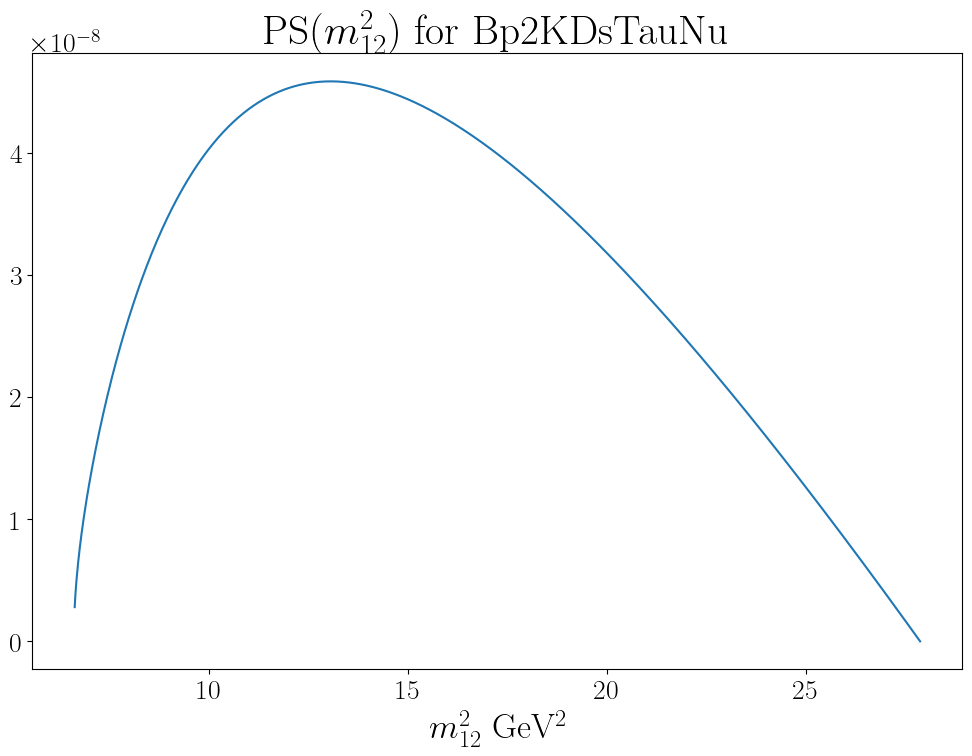

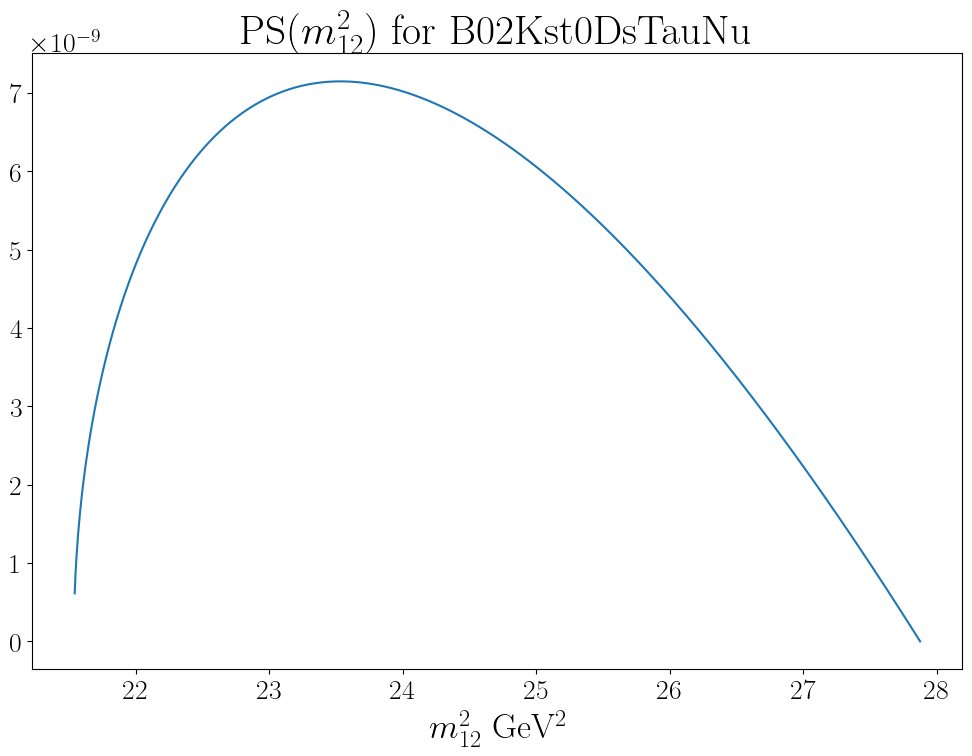

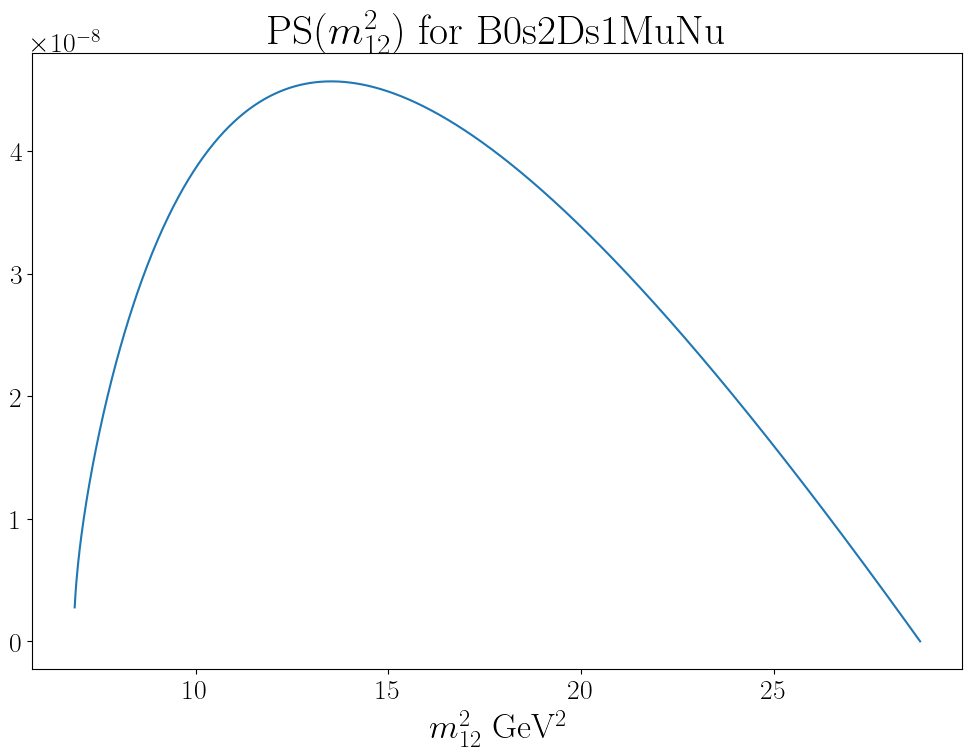

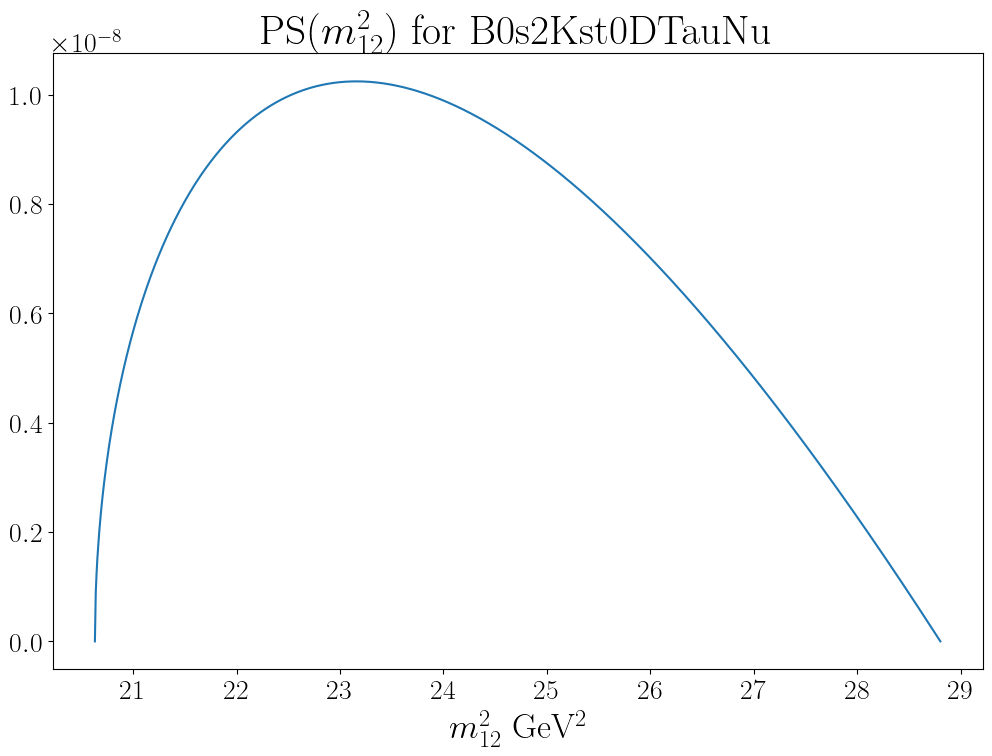

In [7]:
#needed function

def E2st(sqm12,m1,m2):#E2 in 12 rest frame
    return (sqm12-m1**2+m2**2)/(2*sqm12**0.5)

def E3st(sqm12,M,m3):#E3 in 12 rest frame
    return (-sqm12-m3**2+M**2)/(2*sqm12**0.5)

def p2st(sqm12,m1,m2):#p2 in 12 rest frame
    return np.sqrt(E2st(sqm12,m1,m2)**2-m2**2)

def p3st(sqm12,M,m3):#p3 in 12 rest frame
    return np.sqrt(E3st(sqm12,M,m3)**2-m3**2)

def sq_m23_max(sqm12,m1,m2,M,m3):#m23 squared max as function of sqm12 definition
    return (E2st(sqm12,m1,m2)+E3st(sqm12,M,m3))**2-(p2st(sqm12,m1,m2)-p3st(sqm12,M,m3))**2

def sq_m23_min(sqm12,m1,m2,M,m3):#m23 squared min as function of sqm12 definition
    return (E2st(sqm12,m1,m2)+E3st(sqm12,M,m3))**2-(p2st(sqm12,m1,m2)+p3st(sqm12,M,m3))**2

def dPS(sqm12,m1,m2,M,m3):#phase space element as function of sqm12
    return ((np.pi**2)/(2*np.pi)**9)*(1/(4*M**2))*(sq_m23_max(sqm12,m1,m2,M,m3)-sq_m23_min(sqm12,m1,m2,M,m3))

def sq_m12_min(m1,m2):#sqm12 min
    return (m1+m2)**2

def sq_m12_max(M,m3):#sqm12 max
    return (M-m3)**2

#mass in GeV
m_K=0.493677
m_Kst0=0.89555
m_Ds=1.96835
m_D=1.86966
m_Ds1=0.49761+2.01026
m_e=511e-6
m_mu=0.10566
m_tau=1.77686
m_nu=0
m_Bp=5.27934
m_B0=5.27966
m_B0s=5.36692
m_KDs=m_K+m_Ds

#computation of BF B02Kst0DsTauNu
sq_m12_range=np.linspace(sq_m12_min(m_KDs,m_mu),sq_m12_max(m_Bp,m_nu),1000)
plt.figure(figsize=(12,8))
plt.plot(sq_m12_range, dPS(sq_m12_range,m_KDs,m_mu,m_Bp,m_nu))
plt.title("PS($m_{12}^{2}$) for Bp2KDsTauNu")
plt.xlabel("$m_{12}^{2}$ GeV$^2$")

PS_Bp2KDsMuNu=quad(dPS,sq_m12_min(m_KDs,m_mu),sq_m12_max(m_Bp,m_nu),args=(m_KDs,m_mu,m_Bp,m_nu))

print(PS_Bp2KDsMuNu)
print(0.75**4/2)
m_Kst0Ds=m_Kst0+m_Ds

sq_m12_range=np.linspace(sq_m12_min(m_Kst0Ds,m_tau),sq_m12_max(m_B0,m_nu),1000)
plt.figure(figsize=(12,8))
plt.plot(sq_m12_range, dPS(sq_m12_range,m_Kst0Ds,m_tau,m_B0,m_nu))
plt.title("PS($m_{12}^{2}$) for B02Kst0DsTauNu")
plt.xlabel("$m_{12}^{2}$ GeV$^2$")

PS_B02Kst0DsTauNu=quad(dPS,sq_m12_min(m_Kst0Ds,m_tau),sq_m12_max(m_B0,m_nu),args=(m_Kst0Ds,m_tau,m_B0,m_nu))

print(PS_B02Kst0DsTauNu)

BF_Bp2KDsMuNu=6.1e-4
BF_Bp2KDsMuNu_err=1e-4

BF_B02Kst0DsTauNu=BF_Bp2KDsMuNu*(PS_B02Kst0DsTauNu[0]/PS_Bp2KDsMuNu[0])#*0.75**4/2
BF_B02Kst0DsTauNu_err=BF_Bp2KDsMuNu_err*(PS_B02Kst0DsTauNu[0]/PS_Bp2KDsMuNu[0])#*0.75**4/2
BF_B02Kst0DsTauNu_paper=3.0e-5
print(f"BF B02Kst0DsTauNu predicted : {BF_B02Kst0DsTauNu} +- {BF_B02Kst0DsTauNu_err}, paper : {BF_B02Kst0DsTauNu_paper}, paper = predicted * {BF_B02Kst0DsTauNu_paper/BF_B02Kst0DsTauNu} ")

#computation of BF_B0s2Kst0DTauNu
sq_m12_range=np.linspace(sq_m12_min(m_Ds1,m_mu),sq_m12_max(m_B0s,m_nu),1000)
plt.figure(figsize=(12,8))
plt.plot(sq_m12_range, dPS(sq_m12_range,m_Ds1,m_mu,m_B0s,m_nu))
plt.title("PS($m_{12}^{2}$) for B0s2Ds1MuNu")
plt.xlabel("$m_{12}^{2}$ GeV$^2$")

PS_B0s2Ds1MuNu=quad(dPS,sq_m12_min(m_Ds1,m_mu),sq_m12_max(m_B0s,m_nu),args=(m_Ds1,m_mu,m_B0s,m_nu))

print(PS_B0s2Ds1MuNu)

m_Kst0D=m_Kst0+m_D

sq_m12_range=np.linspace(sq_m12_min(m_Kst0D,m_tau),sq_m12_max(m_B0s,m_nu),1000)
plt.figure(figsize=(12,8))
plt.plot(sq_m12_range, dPS(sq_m12_range,m_Kst0D,m_tau,m_B0s,m_nu))
plt.title("PS($m_{12}^{2}$) for B0s2Kst0DTauNu")
plt.xlabel("$m_{12}^{2}$ GeV$^2$")

PS_B0s2Kst0DTauNu=quad(dPS,sq_m12_min(m_Kst0D,m_tau),sq_m12_max(m_B0s,m_nu),args=(m_Kst0D,m_tau,m_B0s,m_nu))

print(PS_B0s2Kst0DTauNu)

BF_B0s2Ds1MuNu=2.7e-3
BF_B0s2Ds1MuNu_err=0.7e-3

BF_B0s2Kst0DTauNu=BF_B0s2Ds1MuNu*(PS_B0s2Kst0DTauNu[0]/PS_B0s2Ds1MuNu[0])#*0.75**4/2
BF_B0s2Kst0DTauNu_err=BF_B0s2Ds1MuNu_err*(PS_B0s2Kst0DTauNu[0]/PS_B0s2Ds1MuNu[0])#*0.75**4/2
BF_B0s2Kst0DTauNu_paper=4.6e-4
print(f"BF B0s2Kst0DTauNu predicted : {BF_B0s2Kst0DTauNu} +- {BF_B0s2Kst0DTauNu_err}, paper : {BF_B0s2Kst0DTauNu_paper}, paper = predicted * {BF_B0s2Kst0DTauNu_paper/BF_B0s2Kst0DTauNu} ")

Plot theoritical DP:

/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:4: RuntimeWarning: divide by zero encountered in divide
  return (sqm12-m1**2+m2**2)/(2*sqm12**0.5)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:7: RuntimeWarning: divide by zero encountered in divide
  return (-sqm12-m3**2+M**2)/(2*sqm12**0.5)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:19: RuntimeWarning: invalid value encountered in add
  return (E2st(sqm12,m1,m2)+E3st(sqm12,M,m3))**2-(p2st(sqm12,m1,m2)+p3st(sqm12,M,m3))**2
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(E2st(sqm12,m1,m2)**2-m2**2)
/var/folders/hc/7r1d6y954cscdrl_dhs2jt_w0000gn/T/ipykernel_2926/2383811620.py:16: RuntimeWarning: invalid value encountered in add
  return (E2st(sqm12,m1,m2)+E3st(sqm12,M,m3))**2-(p2st(sqm12,m1,m2)-p3st(sqm12,M,m3))**2
/var/folders/hc/7r1d6y954cs

'print(sq_m12_grid)\nprint(sq_m23_min(5.94,m1,m2,M,m3))\nprint(sq_m23_max(5.94,m1,m2,M,m3))\nprint(sq_m23_grid>sq_m23_min(sq_m12_grid,m1,m2,M,m3))\nprint(sq_m23_grid<sq_m23_max(sq_m12_grid,m1,m2,M,m3))\nprint(sq_m23_max(sq_m12_grid,m1,m2,M,m3))\nprint(sq_m23_min(sq_m12_grid,m1,m2,M,m3))'

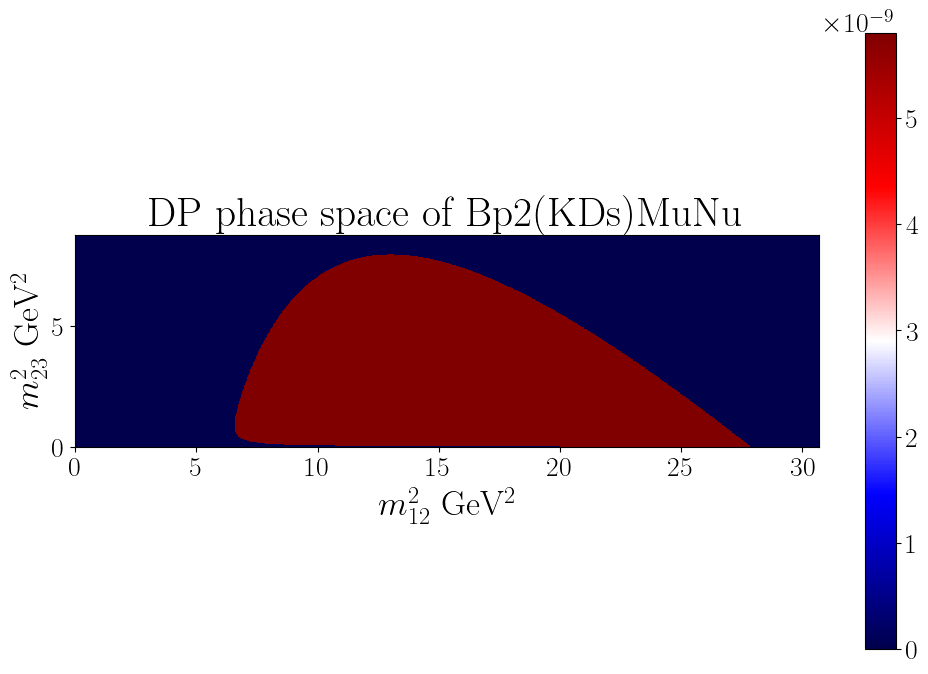

In [8]:

"""#to plot on DP PS of B02KSpipi
M=m_B0
m1=0.13957
m2=0.49761
m3=0.13957
"""

M=m_Bp
m1=m_KDs
m2=m_mu
m3=m_nu

sq_m12_range=np.linspace(0,sq_m12_max(M,m3)*1.1,1000)
sq_m23_range=np.linspace(0,sq_m12_max(M,m1)*1.1,1000)

sq_m12_grid, sq_m23_grid = np.meshgrid(sq_m12_range, sq_m23_range)

grid_cut=sq_m12_grid>sq_m12_min(m1,m2)
grid_cut*=sq_m12_grid<sq_m12_max(M,m3)
#print(grid_cut)
grid_cut*=sq_m23_grid>sq_m23_min(sq_m12_grid,m1,m2,M,m3)
#print(grid_cut)
grid_cut*=sq_m23_grid<sq_m23_max(sq_m12_grid,m1,m2,M,m3)
#print(grid_cut)

PS_grid=((np.pi**2)/(2*np.pi)**9)*(1/(4*M**2))*grid_cut
plt.figure(figsize=(12,8))
plt.pcolormesh(sq_m12_range, sq_m23_range, PS_grid,cmap=plt.cm.get_cmap('seismic'))
plt.axis('scaled')
plt.title('DP phase space of Bp2(KDs)MuNu')
plt.xlabel("$m_{12}^{2}$ GeV$^2$")
plt.ylabel("$m_{23}^{2}$ GeV$^2$")
plt.colorbar()

"""print(sq_m12_grid)
print(sq_m23_min(5.94,m1,m2,M,m3))
print(sq_m23_max(5.94,m1,m2,M,m3))
print(sq_m23_grid>sq_m23_min(sq_m12_grid,m1,m2,M,m3))
print(sq_m23_grid<sq_m23_max(sq_m12_grid,m1,m2,M,m3))
print(sq_m23_max(sq_m12_grid,m1,m2,M,m3))
print(sq_m23_min(sq_m12_grid,m1,m2,M,m3))"""




With 2D integration:

In [9]:
def dPS2D(sqm12,m23,m1,m2,M,m3):#phase space element as function of m12
    return ((np.pi**2)/(2*np.pi)**9)*(1/(4*M**2))#(sq_m23_max(m12,m1,m2,M,m3)-sq_m23_min(m12,m1,m2,M,m3))

def lim_m23(sqm12,m1,m2,M,m3):
    return [sq_m23_min(sqm12,m1,m2,M,m3), sq_m23_max(sqm12,m1,m2,M,m3)]
def lim_m12(m1,m2,M,m3):
    return [sq_m12_min(m1,m2), sq_m12_max(M,m3)]

m_KDs=m_K+m_Ds
PS_Bp2KDsMuNu = nquad(dPS2D,[lim_m23, lim_m12], args=(m_KDs,m_mu,m_Bp,m_nu))
print(PS_Bp2KDsMuNu)

m_Kst0Ds=m_Kst0+m_Ds
PS_B02Kst0DsTauNu = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Kst0Ds,m_tau,m_B0,m_nu))
print(PS_B02Kst0DsTauNu)


BF_B02Kst0DsTauNu=BF_Bp2KDsMuNu*(PS_B02Kst0DsTauNu[0]/PS_Bp2KDsMuNu[0])

print(f"BF B02Kst0DsTauNu predicted : {BF_B02Kst0DsTauNu}, paper : {BF_B02Kst0DsTauNu_paper}, paper = predicted * {BF_B02Kst0DsTauNu_paper/BF_B02Kst0DsTauNu} ")


PS_B0s2Ds1MuNu = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Ds1,m_mu,m_B0s,m_nu))
print(PS_B0s2Ds1MuNu)

m_Kst0D=m_Kst0+m_D
PS_B0s2Kst0DTauNu = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Kst0D,m_tau,m_B0s,m_nu))
print(PS_B0s2Kst0DTauNu)

BF_B0s2Kst0DTauNu=BF_B0s2Ds1MuNu*(PS_B0s2Kst0DTauNu[0]/PS_B0s2Ds1MuNu[0])

print(f"BF B02Kst0DsTauNu predicted : {BF_B0s2Kst0DTauNu}, paper : {BF_B0s2Kst0DTauNu_paper}, paper = predicted * {BF_B0s2Kst0DTauNu_paper/BF_B0s2Kst0DTauNu} ")

(6.415803049468887e-07, 1.0214909123404007e-08)
(3.1017278062524936e-08, 9.059225157371479e-10)
BF B02Kst0DsTauNu predicted : 2.9490524369675736e-05, paper : 3e-05, paper = predicted * 1.017275909506992 
(6.60335313262722e-07, 1.0367822651485978e-08)
(5.7121871565886376e-08, 1.709030891132475e-09)
BF B02Kst0DsTauNu predicted : 0.00023356172255251085, paper : 0.00046, paper = predicted * 1.969500802498063 


#verification : compatible with by hand rectangle integration

def rectintPS(min, max, nb_rec,m1,m2,M,m3):
    I=0

    i=(max-min)/nb_rec
    trailing_x=min
    leading_x=min+i

    while (min<=leading_x<=max) or (min>=leading_x>=max):
        area=dPS((trailing_x+leading_x)/2,m1,m2,M,m3)*i
        I+=area

        leading_x+=i
        trailing_x+=i

    return I

print(rectintPS(sq_m12_min(m_Kst0Ds,m_tau),sq_m12_max(m_B0,m_nu),1000,m_Kst0Ds,m_tau,m_B0,m_nu))

def f(x,a):
    return a*x+np.sin(x)

x=np.linspace(0,2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x, f(x,2))

I=quad(f,0,2*np.pi,args=(2))
print(I)
print(4*np.pi**2)

In [3]:
2.78*10**(-4)*(0.0044+0.0139+0.0144)/0.0044


0.002066045454545454

In [4]:
7.2*10**(-3)*((9.7*10**(-5))/(2.51*10**(-3)))

0.0002782470119521913

In [5]:
(7.2*10**(-3)*((9.7*10**(-5))/(2.51*10**(-3))))*((0.8/7.2)**2+(0.08/2.51)**2+(1.4/9.7)**2)**0.5

5.1451367442153045e-05

In [6]:
0.0044+0.0139+0.0144

0.0327

In [9]:
(0.0005**2+0.0017**2+0.0021**2)**0.5

0.002747726332806817

In [12]:
0.000278*(0.0327/0.0044)

0.0020660454545454545

In [14]:
0.002066*((0.51/2.78)**(2)+(0.27/3.27)**2+(0.5/4.4)**2)**0.5

0.00047735743204916313

In [16]:
0.002066*(0.0139/0.0327)

0.0008782079510703364

In [18]:
0.000878*((0.48/2.07)**2+(0.17/1.39)**2+(0.27/3.27)**2)**0.5

0.00024132328284994656

In [19]:
0.002066*(0.0144/0.0327)

0.0009097981651376147

In [20]:
0.0009098*((0.48/2.07)**2+(0.21/1.44)**2+(0.27/3.27)**2)**0.5

0.000260296920870258

In [21]:
0.0168*0.2302+0.00192*0.892

0.00558

In [22]:
((0.2302*0.0009)**2+(0.0168*0.0025)**2+(0.892*0.0003)**2+(0.00192*0.007)**2)**0.5

0.00034128865495354515

In [23]:
0.095*0.2302+0.028*0.892

0.046845

In [24]:
((0.2302*0.005)**2+(0.095*0.0025)**2+(0.892*0.007)**2+(0.028*0.007)**2)**0.5

0.006356662587396

In [25]:
(2*0.007**2)**0.5

0.009899494936611667

In [3]:
(1.05*10**(-2))*((9.7*10**(-5))/(2.51*10**(-3)))

0.000405776892430279

In [2]:
6.7*10**(-3)/(9.4*10**(-6))

712.7659574468086

In [23]:
1.05/(1.58+1.05)

0.39923954372623577

In [22]:
2.31/(2.31+5.06)

0.31343283582089554

In [24]:
2.44/(2.44+5.3)

0.3152454780361757

In [30]:
4.97/(2.24+4.97)

0.6893203883495145

In [27]:
(0.0012**2+0.0009**2)**0.5

0.0014999999999999998

In [31]:
0.6893*((0.12/4.97)**2+(0.15/7.21)**2)**0.5

0.02196909901668972

In [32]:
0.3107*3*10**(-5)

9.321e-06

In [46]:
0.6893*3*10**(-5)

2.0679e-05

In [47]:
0.3107*3*10**(-5)

9.321e-06

In [50]:
0.93+2.07

3.0

In [42]:
1.43+3.17

4.6

In [92]:
0.00377*0.2302+0.00028*0.892

0.0011176139999999998

In [93]:
0.278+0.878+0.910

2.0660000000000003

In [100]:
(2.05e-3)*0.2302+(3.9e-3)*0.892

0.00395071

In [97]:
6/50

0.12

In [98]:
12/50

0.24

In [106]:
468/12

39.0

In [109]:
6/(50**2)

0.0024

In [110]:
6/50

0.12

In [12]:
2.34e-4*31.07e-2

7.270379999999999e-05

In [13]:
7.270379999999999e-05*((0.61/2.34)**2+(1.41/31.07)**2)**0.5

1.923774616866539e-05

PS computation for guessstimate via last LHCb Bp2KDsDs measurement

In [42]:
#mass in GeV
m_Kp=0.493677
m_Kstp=0.89167
m_Ds=1.96835#using D inplace of Ds : ratio = 0.3 -> 0.4
m_Bp=5.27934
m_B0=5.27966
m_K0=0.497611
m_Kst0=0.89555
#computation of BF B02Kst0DsTauNu
sq_m12_range=np.linspace(sq_m12_min(m_K,m_K0),sq_m12_max(m_Bp,m_D0),1000)

def dPS2D(sqm12,m23,m1,m2,M,m3):#phase space element as function of m12
    return ((np.pi**2)/(2*np.pi)**9)*(1/(4*M**2))#(sq_m23_max(m12,m1,m2,M,m3)-sq_m23_min(m12,m1,m2,M,m3))

def lim_m23(sqm12,m1,m2,M,m3):
    return [sq_m23_min(sqm12,m1,m2,M,m3), sq_m23_max(sqm12,m1,m2,M,m3)]
def lim_m12(m1,m2,M,m3):
    return [sq_m12_min(m1,m2), sq_m12_max(M,m3)]


# PS_B02KK0D0 = nquad(dPS2D,[lim_m23, lim_m12], args=(m_K,m_K0,m_Bp,m_D0))
# print(PS_B02KK0D0)

# # PS 2-body (same result with two methods)
# PS_B02KD0 = np.sqrt(1-(2*((m_D0**2+m_K**2)/m_Bp**2))+(((m_D0**2-m_K**2)**2)/(m_Bp**4)))/(8*np.pi)
# PS_B02KD0 = np.sqrt((m_K**2-(m_Bp+m_D0)**2)*(m_K**2-(m_Bp-m_D0)**2))/(8*np.pi*m_Bp**2)
# print(PS_B02KD0)

PS_Bp2KpDsDs = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Kp,m_Ds,m_Bp,m_Ds))
print(PS_Bp2KpDsDs)

PS_Bp2KstpDsDs = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Kstp,m_Ds,m_Bp,m_Ds))
print(PS_Bp2KstpDsDs)

print(PS_Bp2KstpDsDs[0]/PS_Bp2KpDsDs[0])

# PS_B02K0DsDs = nquad(dPS2D,[lim_m23, lim_m12], args=(m_K0,m_Ds,m_B0,m_Ds))
# print(PS_B02K0DsDs)

# PS_B02Kst0DsDs = nquad(dPS2D,[lim_m23, lim_m12], args=(m_Kst0,m_Ds,m_B0,m_Ds))
# print(PS_B02Kst0DsDs)

# print(PS_B02Kst0DsDs[0]/PS_B02K0DsDs[0])



(1.0763082754483381e-07, 5.719786506886976e-09)
(3.509620214471826e-08, 1.8731280846740542e-09)
0.3260794601815997


In [38]:
(9e-3)*(1.8e-4)/(4.61e-3)

0.000351409978308026

In [39]:
0.000351409978308026*np.sqrt((0.9/9)**2+(0.22/1.8)**2+(0.1/4.61)**2)

5.601525025171454e-05

In [40]:
1.15e-4*1.46*0.4

6.716e-05

In [41]:
2.78/0.67

4.149253731343283

In [2]:
np.sqrt(0.07**2+0.06**2+0.38**2)

0.39102429592034305

In [3]:
5.3/3.64

1.456043956043956

In [4]:
(5.3/3.64)*np.sqrt((0.15/3.64)**2+(0.4/5.3)**2)

0.1252040479377326

In [5]:
1.15e-4*1.46*0.326

5.47354e-05

In [6]:
(1.15e-4*1.46*0.326)*np.sqrt((0.39/1.15)**2+(0.13/1.46)**2)

1.9191590096800213e-05

In [7]:
1.92/5.47

0.3510054844606947

In [9]:
5.47e-5*(3.27e-2/4.4e-3)

0.00040652045454545456

In [11]:
0.00040652045454545456*np.sqrt((1.92/5.47)**2+(0.27/3.27)**2+(0.5/4.4)**2)

0.000153692519607204

In [12]:
4.07e-4*(1.39e-2/3.27e-2)

0.00017300611620795108

In [14]:
0.00017300611620795108*np.sqrt((1.54/4.07)**2+(0.17/1.39)**2+(0.27/3.27)**2)

7.026383578208093e-05

In [15]:
4.07e-4*(1.44e-2/3.27e-2)

0.00017922935779816513

In [16]:
0.00017300611620795108*np.sqrt((1.54/4.07)**2+(0.21/1.44)**2+(0.27/3.27)**2)

7.159509961980334e-05

In [2]:
6e12*0.1512*2*0.407*1.3e-7*(0.0931**2)*0.69*0.3840*0.8

176.3763954455082

In [3]:
176.3763954455082*np.sqrt((0.0005/0.1512)**2+(0.007/0.407)**2+(0.1)**2+2*(0.0005/0.0931)**2+(0.0007/0.3840)**2)

17.959024191995645